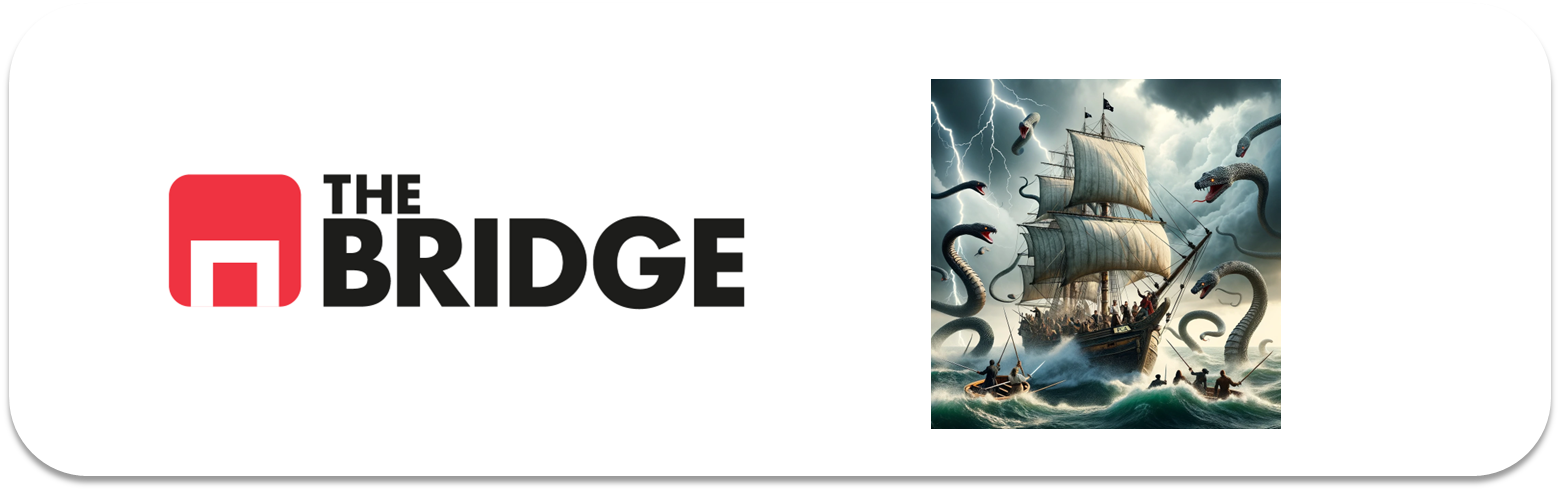

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, balanced_accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
df = pd.read_csv("./data/credit_npo.csv")

In [3]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [5]:
target = 'SeriousDlqin2yrs'

In [6]:
df[target].value_counts(True)

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

In [7]:
#Eliminamos filas con valores nulos
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [9]:
df['NumberOfOpenCreditLinesAndLoans'].value_counts().sort_values(ascending=False)

NumberOfOpenCreditLinesAndLoans
7     1110
6     1031
8     1009
9      965
5      963
4      848
10     765
11     719
3      638
12     574
13     454
2      445
14     365
15     338
1      307
16     236
17     216
18     151
19     129
20     118
0      112
21      62
22      61
23      39
24      38
25      30
26      19
27      16
28      13
29      10
30      10
31       7
33       4
32       3
34       2
35       2
48       1
41       1
49       1
43       1
36       1
38       1
40       1
Name: count, dtype: int64

Lo puedo dibidir en:
- <=15
- '>15 y <= 30
- '>30

Y sustituirlo por 0, 1 y 2 respectivamente.

In [10]:
df['NumberOfTimes90DaysLate'].value_counts().sort_values(ascending=False)

NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1
13        1
Name: count, dtype: int64

Esta no la voy a dividir porque parece que hay algún código interno que desconozco.

In [11]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_values(ascending=False)

NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64

Con código interno, no la divido.

In [12]:
# df['NumberRealEstateLoansOrLines'].value_counts().sort_values(ascending=False)
'''
Podemos clasificar en:
<= 5
>= 6 y <=10
>10
Y sustituirlo por 0, 1 y 2 respectivamente.

Pero no es de las que empiezan por number of.. asi que la trataremos como numerica.

'''

'\nPodemos clasificar en:\n<= 5\n>= 6 y <=10\n>10\nY sustituirlo por 0, 1 y 2 respectivamente.\n\nPero no es de las que empiezan por number of.. asi que la trataremos como numerica.\n\n'

In [13]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_values(ascending=False)

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
98       10
5         4
11        1
Name: count, dtype: int64

También parece tener algún código interno.

In [14]:
df['NumberOfDependents'].value_counts().sort_values(ascending=False)

NumberOfDependents
0.0     6413
1.0     2369
2.0     1813
3.0      881
4.0      251
5.0       61
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

Podemos categorizarlo en:
- <=2
- '>=3 y <=6
- '>=7

Y sustituirlo por 0, 1 y 2 respectivamente.

Pasos siguientes:
- Hacer el train_test_split
- Modificar las features según lo anterior
- Como vamos a usar RandomForestClassifier no hace falta escalar
- Hacer el miniEda siguiendo los pasos del enunciado.

In [15]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state= 42)

In [16]:
train_set[target].value_counts(True)

SeriousDlqin2yrs
0    0.929856
1    0.070144
Name: proportion, dtype: float64

NOTA: está muy desbalanceado.

Modificaciones de las variables categóricas:

In [17]:
condiciones = [
    train_set['NumberOfOpenCreditLinesAndLoans'] <= 15,
    train_set['NumberOfOpenCreditLinesAndLoans'].between(16, 30),
    train_set['NumberOfOpenCreditLinesAndLoans'] > 30
]

# Definir los valores a asignar para cada condición
valores = [0, 1, 2]

# Aplicar reemplazo
train_set['Group_NumberOfOpenCreditLinesAndLoans'] = np.select(condiciones, valores)

In [18]:

#condiciones = [
   # train_set['NumberRealEstateLoansOrLines'] <= 5,
    #train_set['NumberRealEstateLoansOrLines'].between(6, 10),
   # train_set['NumberRealEstateLoansOrLines'] > 10
#]

# Definir los valores a asignar para cada condición
#valores = [0, 1, 2]

# Aplicar reemplazo
#train_set['Group_NumberRealEstateLoansOrLines'] = np.select(condiciones, valores)

In [19]:
condiciones = [
    train_set['NumberOfDependents'] <= 2,
    train_set['NumberOfDependents'].between(3, 6),
    train_set['NumberOfDependents'] > 7
]

# Definir los valores a asignar para cada condición
valores = [0, 1, 2]

# Aplicar reemplazo
train_set['Group_NumberOfDependents'] = np.select(condiciones, valores)

In [20]:
train_set

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Group_NumberOfOpenCreditLinesAndLoans,Group_NumberOfDependents
11145,0,0.391240,68,0,2.693124,2166.0,13,0,2,0,0.0,0,0
2012,0,0.906540,59,0,0.325227,6496.0,7,0,0,0,1.0,0,0
5428,0,0.933223,52,1,0.372442,8258.0,3,0,1,0,3.0,0,1
12130,0,0.857859,50,0,0.511098,5225.0,9,0,1,0,0.0,0,0
36,0,0.000000,61,0,0.414167,5166.0,5,0,1,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966,0,0.397822,53,0,0.332584,11560.0,14,0,2,0,0.0,0,0
5512,0,0.015171,76,0,0.005427,3500.0,4,0,0,0,0.0,0,0
5719,0,0.988201,62,0,0.450432,8442.0,4,0,1,0,0.0,0,0
922,0,0.122072,41,0,0.638133,3749.0,9,0,1,0,1.0,0,0


In [21]:
#mismos cambios aplicados a test
condiciones = [
    test_set['NumberOfOpenCreditLinesAndLoans'] <= 15,
    test_set['NumberOfOpenCreditLinesAndLoans'].between(16, 30),
    test_set['NumberOfOpenCreditLinesAndLoans'] > 30
]


valores = [0, 1, 2]
test_set['Group_NumberOfOpenCreditLinesAndLoans'] = np.select(condiciones, valores)



#condiciones = [
    #test_set['NumberRealEstateLoansOrLines'] <= 5,
    #test_set['NumberRealEstateLoansOrLines'].between(6, 10),
    #test_set['NumberRealEstateLoansOrLines'] > 10
#]

# valores = [0, 1, 2]
# test_set['Group_NumberRealEstateLoansOrLines'] = np.select(condiciones, valores)


condiciones = [
    test_set['NumberOfDependents'] <= 2,
    test_set['NumberOfDependents'].between(3, 6),
    test_set['NumberOfDependents'] > 7
]


valores = [0, 1, 2]
test_set['Group_NumberOfDependents'] = np.select(condiciones, valores)

In [22]:
test_set

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Group_NumberOfOpenCreditLinesAndLoans,Group_NumberOfDependents
8653,0,0.146506,77,0,0.091313,6307.0,14,0,0,0,0.0,0,0
9542,0,0.000000,31,0,0.000000,2166.0,4,0,0,0,0.0,0,0
11932,1,0.527101,50,3,0.467540,5498.0,15,1,1,1,1.0,0,0
796,1,0.594313,44,0,0.991717,3500.0,9,0,1,0,1.0,0,0
8882,0,0.251177,73,0,0.616590,3700.0,8,0,3,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,0,0.153984,56,0,0.293055,6090.0,10,0,1,0,0.0,0,0
10119,0,0.143378,51,0,0.229799,15308.0,19,0,3,0,3.0,1,1
8600,0,0.528468,61,0,0.849322,4200.0,8,0,2,0,0.0,0,0
6818,0,0.303600,38,0,0.474848,5108.0,7,0,2,0,1.0,0,0


### MiniEDA

In [23]:
features_num = ['RevolvingUtilizationOfUnsecuredLines',	'age', 'NumberRealEstateLoansOrLines', 'DebtRatio', 'MonthlyIncome']
features_cat = [col for col in train_set.columns.to_list() if col not in ([target] + features_num)]

#### Análisis visual
Categóricas:

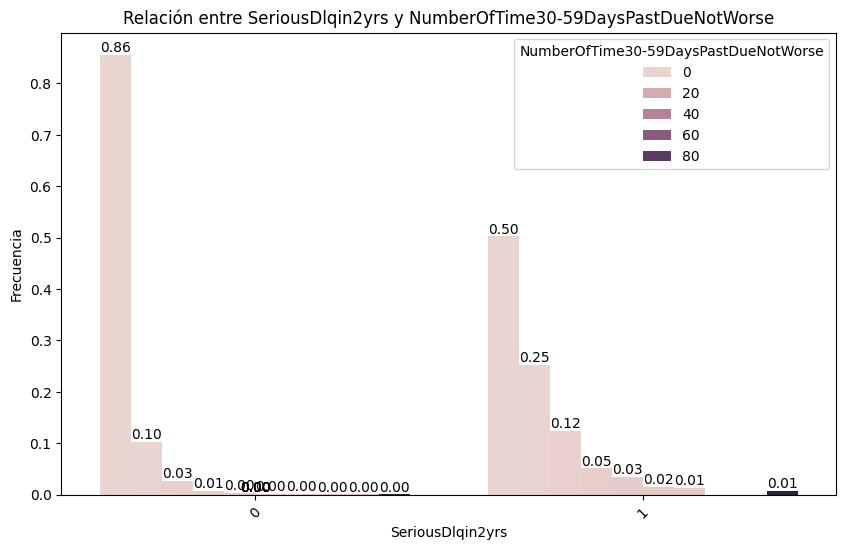

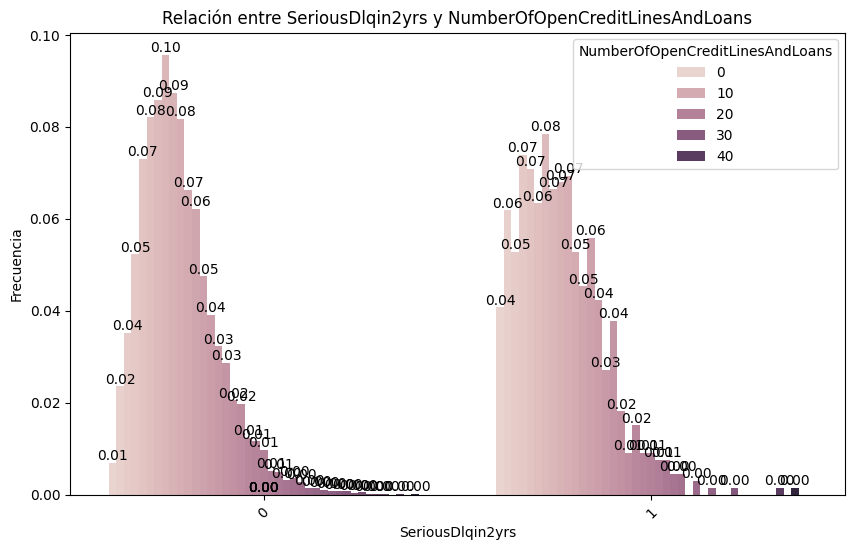

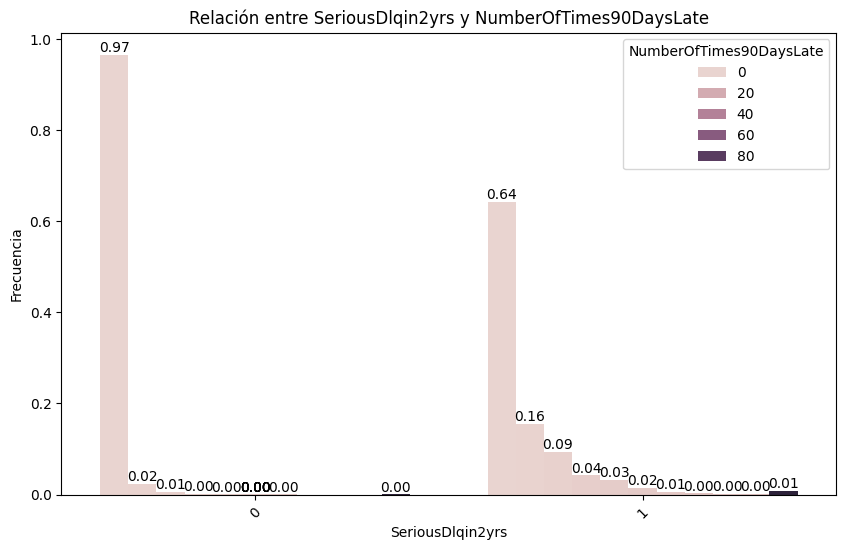

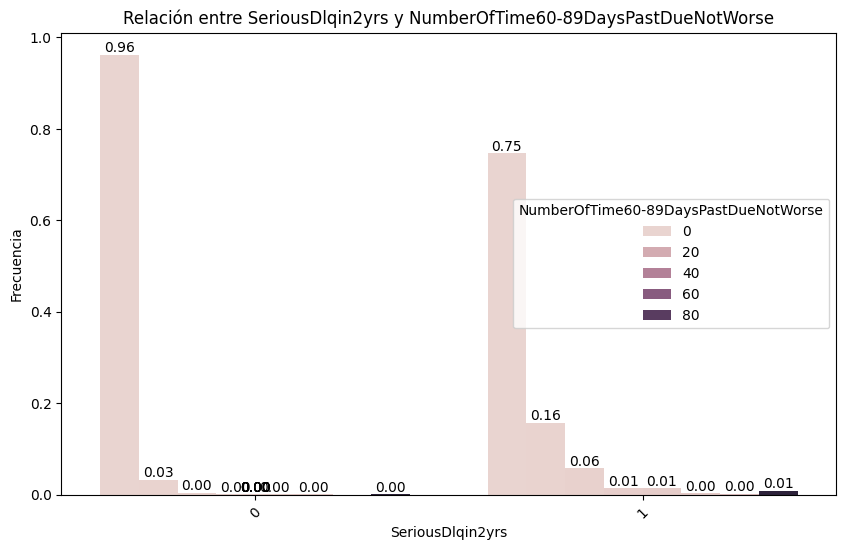

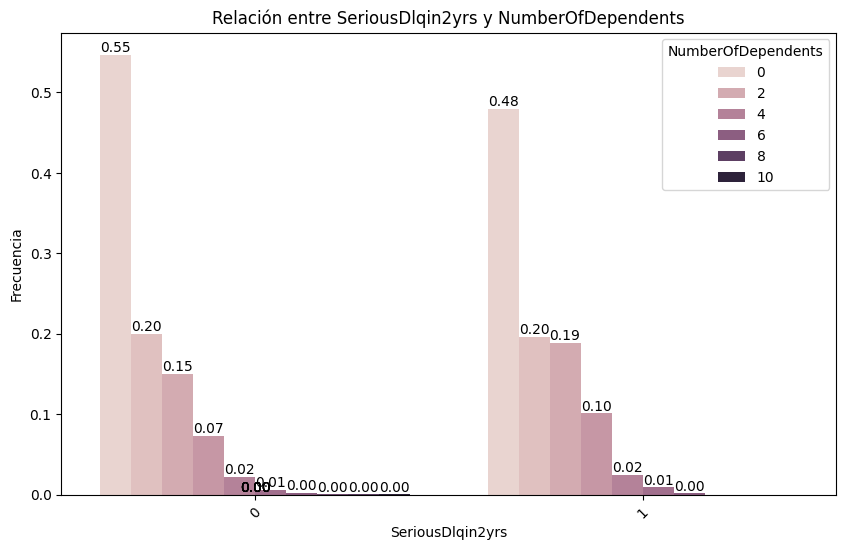

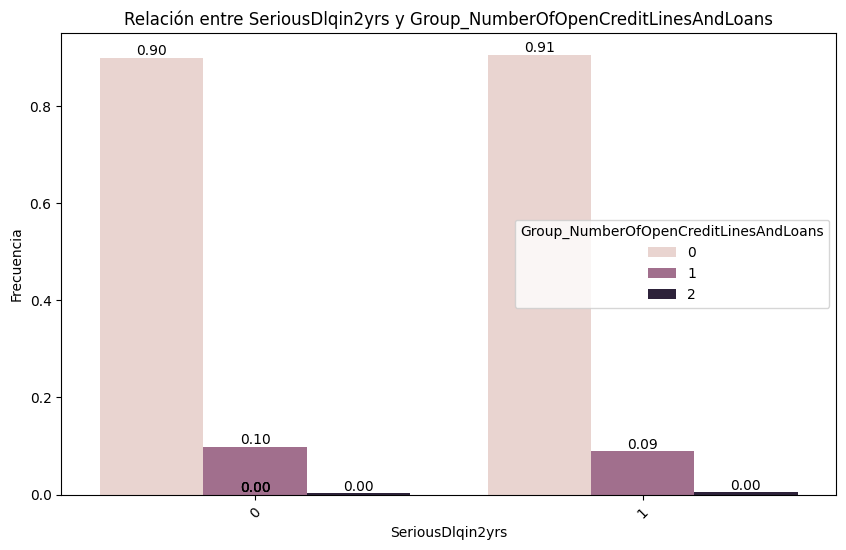

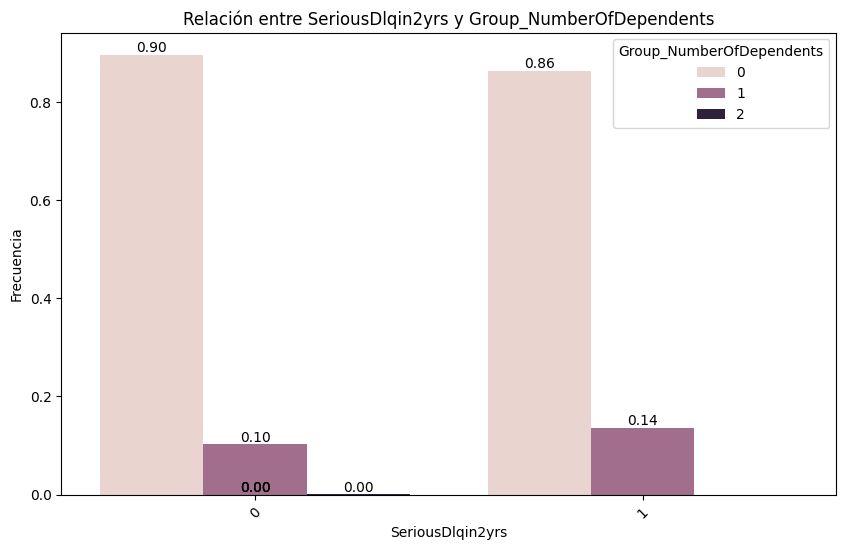

In [24]:
for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set,target,col,show_values= True, relative_freq= True)

Las variables categóricas aparenetemente no parece que seleccionen bien el target, pero solo quitaremos las nuevas que hemos creado,la de numero de dependientes y la de NumberOfOpenCreditLinesAndLoans

Numéricas:

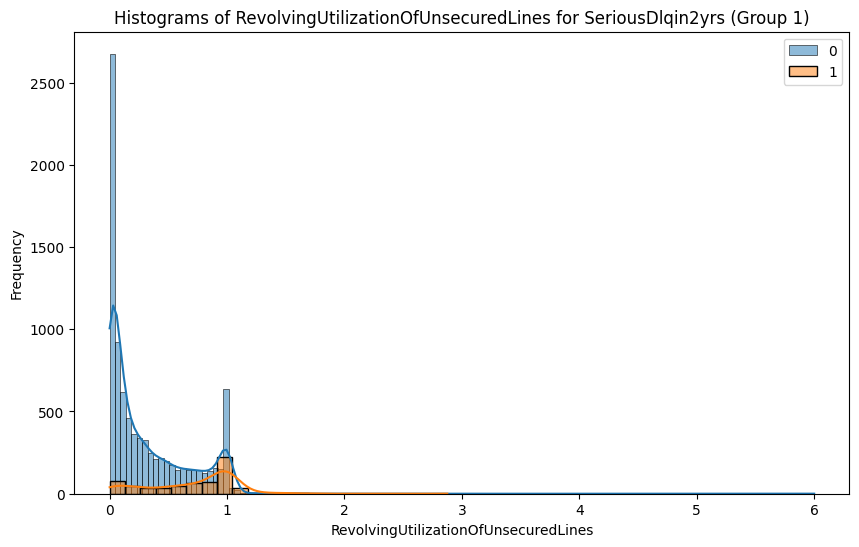

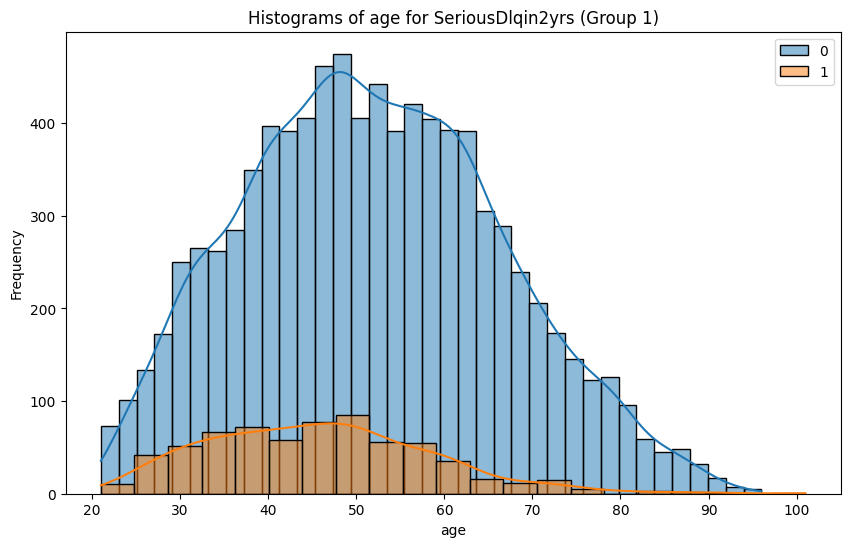

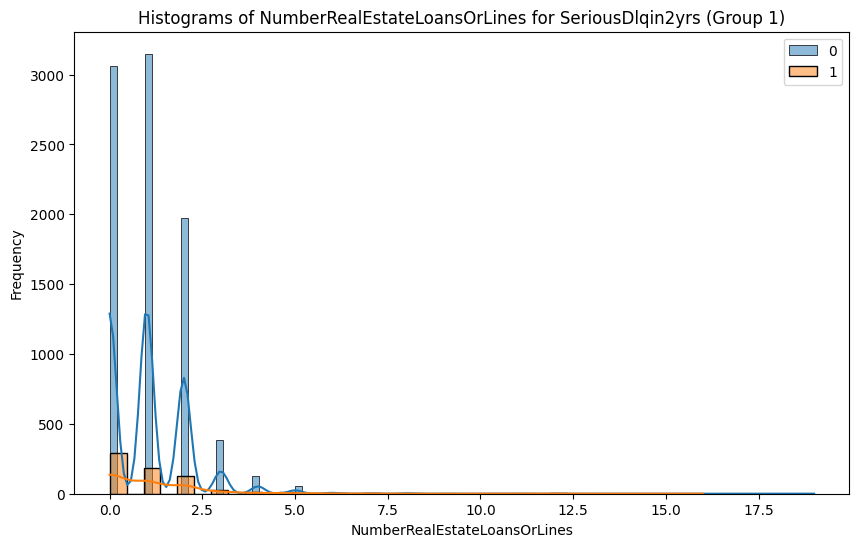

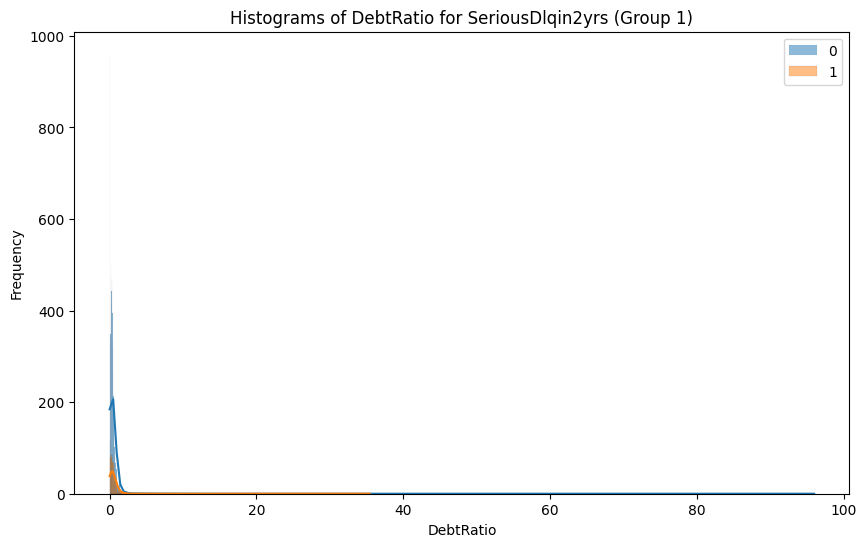

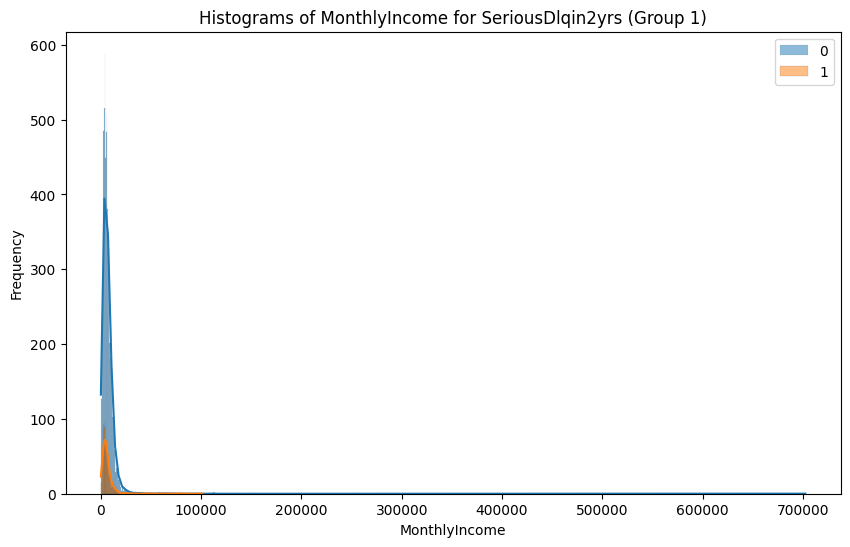

In [25]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

Dentro de las variables numéricas, por su apariencia, podríamos quitarnos 'MonthlyIncome'y 'DebtRaio'.

In [26]:
train_set[target].value_counts()

SeriousDlqin2yrs
0    8789
1     663
Name: count, dtype: int64

<Axes: >

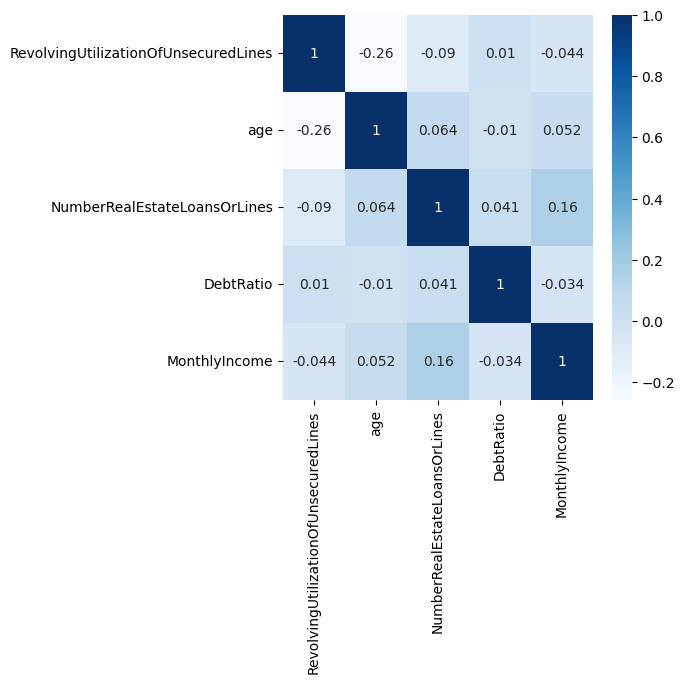

In [27]:
corr= train_set[features_num].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr[features_num], annot= True, cmap= "Blues")

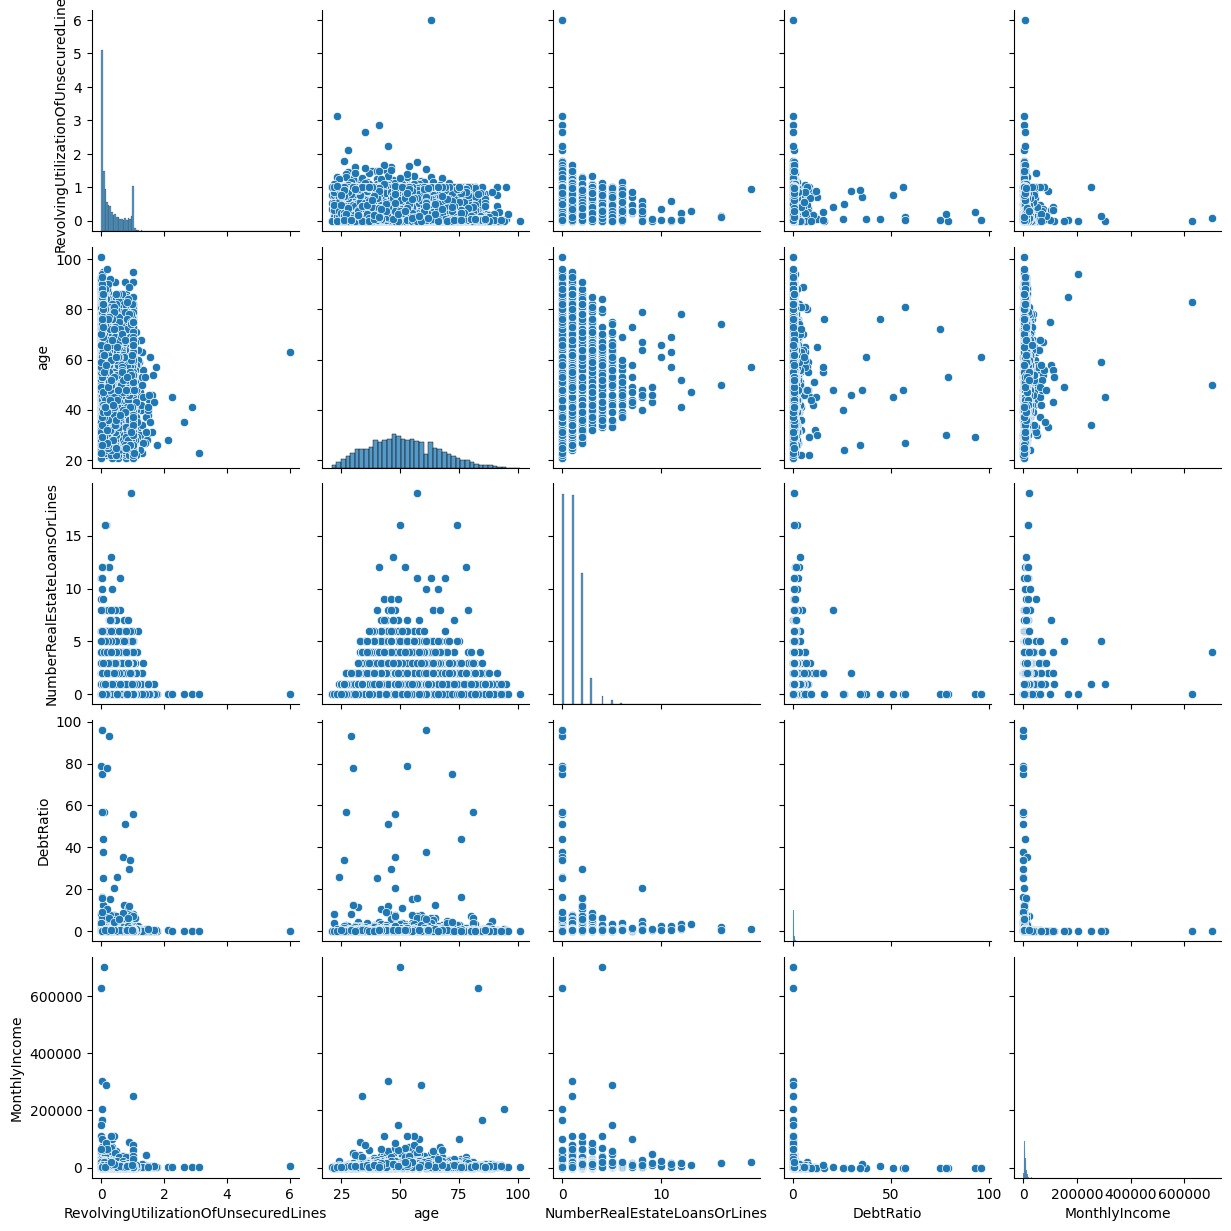

In [28]:
sns.pairplot(train_set[features_num])

Tras los análisis observamos que las features numéricas no están muy correlacionadas entre sí, por lo que las dejamos.

In [29]:
features_cat

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Group_NumberOfOpenCreditLinesAndLoans',
 'Group_NumberOfDependents']

In [30]:
features_select_v0 = ['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberRealEstateLoansOrLines',
 ]

## Ejercicio 2.B
#### Mutual information:

In [31]:
from sklearn.metrics import mutual_info_score

for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(train_set[col],train_set[target]))

MI(NumberOfTime30-59DaysPastDueNotWorse;SeriousDlqin2yrs): 0.02579518989069967
MI(NumberOfOpenCreditLinesAndLoans;SeriousDlqin2yrs): 0.006862073120939793
MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.03715204485831453
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.019559061082302584
MI(NumberOfDependents;SeriousDlqin2yrs): 0.0009884970745398418
MI(Group_NumberOfOpenCreditLinesAndLoans;SeriousDlqin2yrs): 8.898560021849229e-05
MI(Group_NumberOfDependents;SeriousDlqin2yrs): 0.00037918193371136314


In [32]:
features_cat_select_mi = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']

#### SelectKBest y ANOVA:

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

#features_num.remove("quality")
X_train_anova = train_set[features_num]
y_train_anova = train_set[target]
selector = SelectKBest(f_classif, k=3) # kQueremos escoger las 3 features con los p-values más bajos
x_data_kbest = selector.fit_transform(X_train_anova, y_train_anova)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest

,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome
0,0.391240,68.0,2166.0
1,0.906540,59.0,6496.0
2,0.933223,52.0,8258.0
3,0.857859,50.0,5225.0
4,0.000000,61.0,5166.0
...,...,...,...
9447,0.397822,53.0,11560.0
9448,0.015171,76.0,3500.0
9449,0.988201,62.0,8442.0
9450,0.122072,41.0,3749.0


In [34]:
features_num_select_anova = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome']

In [35]:
features_select_v1 = features_cat_select_mi + features_num_select_anova

In [36]:
features_select_v1

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome']

### Ejercicio 2.C 
#### SelectFromModel

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr_selector = LogisticRegression(max_iter = 1000)
rf_selector = RandomForestClassifier(random_state= 42)

In [38]:
rf_selector.fit(train_set[features_num],train_set[target])

RandomForestClassifier(random_state=42)

In [39]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.3071217 , 0.24801536, 0.23838105])

In [40]:
from sklearn.feature_selection import SelectFromModel
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median")
selector_model.fit(train_set[features_num],train_set[target]) 

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [41]:
selector_model.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'MonthlyIncome'], dtype=object)

In [42]:
features_select_v2 = selector_model.get_feature_names_out().tolist()

In [43]:
features_select_v2

['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']

### Ejercicio 2.D
#### RFE

In [44]:
X_train_rfe = train_set[features_num]
y_train_rfe = train_set[target]

In [45]:
from sklearn.feature_selection import RFE

In [46]:
rf_RFE = RandomForestClassifier(random_state= 42) 

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 3, # Pongo 3 como anteriormente
          step = 1) 

rfe.fit(X_train_rfe, y_train_rfe)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features_num).sort_values("ranking")

[1 2 3 1 1]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
DebtRatio,1
MonthlyIncome,1
age,2
NumberRealEstateLoansOrLines,3


In [47]:
# se ha quedado con las mismas que el selectfrommodel
features_select_v3 = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']

### Ejercicio 2.E
#### SFS

In [48]:
X_train_sfs = train_set[features_num]
y_train_sfs = train_set[target]

In [49]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 3,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train_sfs, y_train_sfs)


SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=3, scoring='balanced_accuracy')

In [50]:
print("Elegidasd SFS:", sfs_forward.get_feature_names_out())

Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberRealEstateLoansOrLines']


In [51]:
features_select_v4 = sfs_forward.get_feature_names_out().tolist()

In [52]:
features_select_v4

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberRealEstateLoansOrLines']

### Ejercicio 2.F
#### Hard-voting

In [53]:
selected_features = list(set(features_select_v0 + features_select_v1 + features_select_v2 + features_select_v3 + features_select_v4))
selected_features

['DebtRatio',
 'MonthlyIncome',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'age',
 'NumberRealEstateLoansOrLines',
 'RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTimes90DaysLate']

In [54]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]

In [55]:
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [56]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Group_NumberOfOpenCreditLinesAndLoans,Group_NumberOfDependents
11145,0.391240,68,0,2.693124,2166.0,13,0,2,0,0.0,0,0
2012,0.906540,59,0,0.325227,6496.0,7,0,0,0,1.0,0,0
5428,0.933223,52,1,0.372442,8258.0,3,0,1,0,3.0,0,1
12130,0.857859,50,0,0.511098,5225.0,9,0,1,0,0.0,0,0
36,0.000000,61,0,0.414167,5166.0,5,0,1,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11966,0.397822,53,0,0.332584,11560.0,14,0,2,0,0.0,0,0
5512,0.015171,76,0,0.005427,3500.0,4,0,0,0,0.0,0,0
5719,0.988201,62,0,0.450432,8442.0,4,0,1,0,0.0,0,0
922,0.122072,41,0,0.638133,3749.0,9,0,1,0,1.0,0,0


In [57]:
y_train

11145    0
2012     0
5428     0
12130    0
36       0
        ..
11966    0
5512     0
5719     0
922      0
7727     0
Name: SeriousDlqin2yrs, Length: 9452, dtype: int64

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [59]:
# Crear el clasificador RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Almacenamos los modelos entrenados
models = []
selected_features = []  # Para almacenar las características seleccionadas por cada modelo

# Entrenamos un modelo por cada conjunto de características
for i, features in enumerate([features_select_v0, features_select_v1, features_select_v2, features_select_v3, features_select_v4]):
    X_train_selected = X_train[features]  # Seleccionar solo las características correspondientes
    X_test_selected = X_test[features]
    
    # Entrenar el modelo
    rf.fit(X_train_selected, y_train)
    
    # Evaluar el modelo
    y_pred = rf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Modelo con lista {i}, precisión: {accuracy}")
    
    # Agregar el modelo a la lista de modelos
    models.append(('model_' + str(i), rf))
    
    # Guardar las características utilizadas por este modelo
    selected_features.append(features)

# Ahora, aplicar Hard Voting con los modelos entrenados
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Entrenar el modelo de Hard Voting
voting_clf.fit(X_train, y_train)

# Evaluar el rendimiento del modelo de Hard Voting
accuracy = voting_clf.score(X_test, y_test)
print(f"Precisión del modelo de Hard Voting: {accuracy}")

# Ver las características seleccionadas por cada modelo entrenado
for i, features in enumerate(selected_features):
    print(f"Características seleccionadas por el modelo {i}: {features}")

Modelo con lista 0, precisión: 0.9259729272419628
Modelo con lista 1, precisión: 0.9318950930626058
Modelo con lista 2, precisión: 0.9230118443316413
Modelo con lista 3, precisión: 0.9230118443316413
Modelo con lista 4, precisión: 0.916243654822335
Precisión del modelo de Hard Voting: 0.9318950930626058
Características seleccionadas por el modelo 0: ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberRealEstateLoansOrLines']
Características seleccionadas por el modelo 1: ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome']
Características seleccionadas por el modelo 2: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']
Características seleccionadas por el modelo 3: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']
Caract

### Escoger modelo

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

In [61]:
X = df.drop(target, axis = 1)
y = df[target]

In [65]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "LightGBM": lgb.LGBMClassifier(objective='binary', random_state=42)
}

# Crear un diccionario para almacenar los resultados
results = {name: [] for name in models.keys()}

# Crear el escalador
scaler = StandardScaler()

# Aplicar validación cruzada para cada modelo y lista de características
for name, model in models.items():
    print(f"Entrenando {name}...")
    
    for i, features in enumerate([features_select_v0, features_select_v1, features_select_v2, features_select_v3, features_select_v4]):
        # Seleccionar las características correspondientes de X
        X_selected = X[features]
        
        # Escalar las características seleccionadas
        X_scaled = scaler.fit_transform(X_selected)
        
        # Realizar validación cruzada con el modelo y las características seleccionadas
        cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')  
        
        # Guardar el resultado de la validación cruzada
        results[name].append(np.mean(cv_scores))
        
        print(f"Modelo {name}, Lista {i}, Promedio de Precisión (Cross-Validation): {np.mean(cv_scores):.4f}")
        
#Comparar los resultados y seleccionar el mejor modelo
print("\nResultados de la validación cruzada por modelo y lista de características:")
for name, scores in results.items():
    print(f"{name}:")
    for i, score in enumerate(scores):
       print(f"  Lista {i}: {score:.4f}")

# Selección del mejor modelo (el que tenga la mejor precisión promedio en la validación cruzada)
best_model_name = max(results, key=lambda x: np.mean(results[x]))
best_score = np.max(results[best_model_name])

print(f"\nEl mejor modelo es: {best_model_name} con una precisión promedio de {best_score:.4f}")

Entrenando Random Forest...
Modelo Random Forest, Lista 0, Promedio de Precisión (Cross-Validation): 0.9279
Modelo Random Forest, Lista 1, Promedio de Precisión (Cross-Validation): 0.9312
Modelo Random Forest, Lista 2, Promedio de Precisión (Cross-Validation): 0.9285
Modelo Random Forest, Lista 3, Promedio de Precisión (Cross-Validation): 0.9285
Modelo Random Forest, Lista 4, Promedio de Precisión (Cross-Validation): 0.9152
Entrenando Logistic Regression...
Modelo Logistic Regression, Lista 0, Promedio de Precisión (Cross-Validation): 0.9314
Modelo Logistic Regression, Lista 1, Promedio de Precisión (Cross-Validation): 0.9313
Modelo Logistic Regression, Lista 2, Promedio de Precisión (Cross-Validation): 0.9288
Modelo Logistic Regression, Lista 3, Promedio de Precisión (Cross-Validation): 0.9288
Modelo Logistic Regression, Lista 4, Promedio de Precisión (Cross-Validation): 0.9287
Entrenando LightGBM...
[LightGBM] [Info] Number of positive: 664, number of negative: 8788
[LightGBM] [Info]

#### Optimización mejor modelo
Usaremos como lista de features la features_select_v0

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# Filtrar las features seleccionadas
X_train_selected = X_train[features_select_v0]
X_test_selected = X_test[features_select_v0]

# Definir el modelo
lgb_clf = lgb.LGBMClassifier(objective='binary', random_state=42)

In [68]:
# Creamos el grid
param_grid = {
    'num_leaves': [10, 20, 30],  
    'max_depth': [-1, 5, 10],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'n_estimators': [100, 200, 500],  
    'min_child_samples': [10, 20, 30]  
}

In [70]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=lgb_clf, 
    param_distributions=param_grid,
    n_iter=20,  # Número de combinaciones a probar
    scoring='balanced_accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_selected, y_train)

# Obtener los mejores parámetros y el mejor resultado
print(f"Mejores parámetros: {random_search.best_params_}")
print(f"Mejor precisión balanceada en CV: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 663, number of negative: 8789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 9452, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.070144 -> initscore=-2.584481
[LightGBM] [Info] Start training from score -2.584481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [71]:
# Evaluar en test con las mismas features
y_pred = random_search.best_estimator_.predict(X_test_selected)
test_balanced_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Mejores parámetros: {random_search.best_params_}")
print(f"Balanced Accuracy en test: {test_balanced_acc:.4f}")

Mejores parámetros: {'num_leaves': 30, 'n_estimators': 500, 'min_child_samples': 30, 'max_depth': 5, 'learning_rate': 0.1}
Balanced Accuracy en test: 0.5940


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.